<div style="text-align: center;">
  <h1><strong>Pandas Practicing Lab </strong></h1>
</div>



## Importing Needed Libs

In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

## Reading the Data File
Wroking with the survery data from Stackoverflow for the year 2019. (you may download the files through their official website)

In [4]:
os.chdir('E:\\')
Data_file=r'\Codes\Data\survey_results_public.csv'
Schema_file=r'\Codes\Data\survey_results_schema.csv'
df=pd.read_csv(Data_file)
df_schema=pd.read_csv(Schema_file)


## Getting to Know our Data Shape and Some Info

In [ ]:
pd.set_option('display.max_columns',85); pd.set_option('display.max_rows',85) #Setting our column display size to cover all our cells 
df.info() #Printing General info about our data set

In [101]:
df.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [12]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [13]:
df_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


## Some Playing with the Data   

In [98]:
columns=df.columns
print(df['Hobbyist'].value_counts())
print(df['Country'].value_counts().sort_values(axis=0,ascending=False)[0:10])


Hobbyist
Yes    71257
No     17626
Name: count, dtype: int64
Country
United States     20949
India              9061
Germany            5866
United Kingdom     5737
Canada             3395
France             2391
Brazil             1948
Poland             1922
Australia          1903
Netherlands        1852
Name: count, dtype: int64


<b>Adjusting our indexing to whatever is most convinient</b>

We can only run that one once as it will change the actual dfs

In [25]:
df.set_index('Respondent',inplace=True)
df_schema.set_index('Column',inplace=True)


In [35]:
df_schema.sort_index(inplace=True)
df_schema.loc['MgrIdiot','QuestionText']


'How confident are you that your manager knows what they’re doing?'

### Doing some filterization then visualization to the resultant data

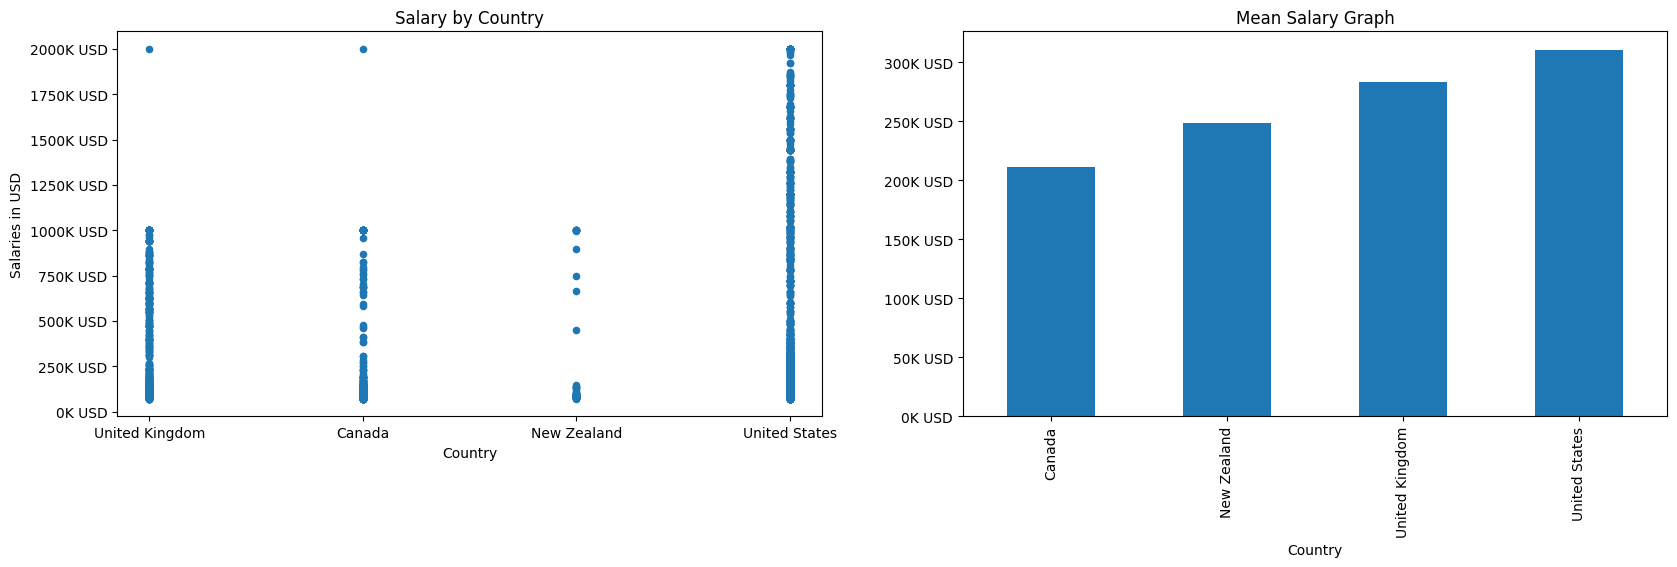

In [85]:
#Creating Filters based on [Salary and Country and Python]
Salary_Filter=df['ConvertedComp']>70000
Python_Filter=df['LanguageWorkedWith'].str.contains('Python',na=False)
Countries=['United States','United Kingdom','Canada','New Zealand']
Countries_Filter=df['Country'].isin(Countries)

#Adding All Filters together
Final_Filter=Salary_Filter & Python_Filter & Countries_Filter
Filtered_Data=df.loc[Final_Filter,['Country','LanguageWorkedWith','ConvertedComp']].sort_values(axis=0,by='ConvertedComp',ascending=True)

#Plotting the data in one side by side Figure
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,5))

Scattered=Filtered_Data[['Country','ConvertedComp']]
Scattered.reset_index(drop=True,inplace=True)
ax1=Scattered.plot.scatter(x='Country',y='ConvertedComp', ax=ax1)
ax1.set_title('Salary by Country')
ax1.set_ylabel('Salaries in USD')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000)}K USD'))


Meaned=Filtered_Data.groupby('Country')['ConvertedComp'].mean()
ax2=Meaned.plot.bar(ax=ax2)
ax2.set_title('Mean Salary Graph')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000)}K USD'))

plt.show()



### Checking some Statistics based on grouped criteria

In [110]:
Country_df=df.groupby(['Country'])
Country_df.get_group(('Egypt',))['SocialMedia'].value_counts().head(10)

SocialMedia
Facebook                    116
YouTube                      83
WhatsApp                     42
Twitter                      34
LinkedIn                     14
Reddit                       12
Instagram                     7
I don't use social media      5
VK ВКонта́кте                 1
Name: count, dtype: int64

In [132]:
Country_df['ConvertedComp'].median()['Egypt']

8844.0

In [135]:
Country_df[['ConvertedComp','CompTotal']].agg(['median','mean','max','min'])

ConvertedComp                            \
                                            median           mean        max   
Country                                                                        
Afghanistan                                 6222.0  101953.333333  1000000.0   
Albania                                    10818.0   21833.700000   187668.0   
Algeria                                     7878.0   34924.047619  1000000.0   
Andorra                                   160931.0  160931.000000   171862.0   
Angola                                      7764.0    7764.000000     7764.0   
...                                            ...            ...        ...   
Venezuela, Bolivarian Republic of...        6384.0   14581.627907   137484.0   
Viet Nam                                   11892.0   17233.436782   140000.0   
Yemen                                      11940.0   16909.166667    60000.0   
Zambia                                      5040.0   10075.375000    40524.0   
Zimbabwe                                   19200.0   34046.666667   180000.0   

                                                 CompTotal                \
                                           min      median          mean   
Country                                                                    
Afghanistan                                0.0     39000.0  5.418654e+07   
Albania                                 1320.0     65000.0  1.707424e+05   
Algeria                                    0.0     55000.0  7.544398e+04   
Andorra                               150000.0     76500.0  7.650000e+04   
Angola                                  7764.0    202000.0  2.020000e+05   
...                                        ...         ...           ...   
Venezuela, Bolivarian Republic of...       0.0      1000.0  1.174443e+05   
Viet Nam                                 200.0  15000000.0  2.613438e+07   
Yemen                                    799.0    125000.0  1.375000e+05   
Zambia                                   400.0      5000.0  2.774375e+04   
Zimbabwe                                 900.0      1600.0  7.841667e+03   

                                                             
                                              max       min  
Country                                                      
Afghanistan                           648838511.0       1.0  
Albania                                 2688000.0     400.0  
Algeria                                  300000.0       0.0  
Andorra                                  150000.0    3000.0  
Angola                                   202000.0  202000.0  
...                                           ...       ...  
Venezuela, Bolivarian Republic of...    3000000.0       0.0  
Viet Nam                              365000000.0       0.0  
Yemen                                    300000.0    5000.0  
Zambia                                   150000.0     100.0  
Zimbabwe                                  70000.0      75.0  

[179 rows x 8 columns]

In [198]:
Python_ds=Country_df['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum()).sort_values(ascending=False)

No_people=Country_df['LanguageWorkedWith'].count().sort_values(ascending=False)

result=((Python_ds/No_people)*100).dropna().apply(lambda x: f'{x:0.2f}'+"%")
result=result.to_frame()
result


,LanguageWorkedWith
Country,
Afghanistan,20.51%
Albania,27.71%
Algeria,31.75%
Andorra,0.00%
Angola,50.00%
...,...
"Venezuela, Bolivarian Republic of...",32.18%
Viet Nam,35.45%
Yemen,17.65%


In [123]:
Social_df=df.groupby(['SocialMedia'])
Social_df.get_group(('LinkedIn',))['Country'].value_counts()

Country
United States        1020
India                 955
Canada                179
United Kingdom        175
Germany               141
                     ... 
Malta                   1
Republic of Korea       1
Monaco                  1
Senegal                 1
Afghanistan             1
Name: count, Length: 120, dtype: int64

In [ ]:
df.isna()

In [ ]:
df.fillna(0)

In [182]:
df['YearsCode'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 'Less than 1 year', '30', '9', '26', '40', '19',
       '15', '20', '28', '25', '1', '22', '11', '33', '50', '41', '18',
       '34', '24', '23', '42', '27', '21', '36', '32', '39', '38', '31',
       '37', 'More than 50 years', '29', '44', '45', '48', '46', '43',
       '47', '49'], dtype=object)

In [189]:
df['YearsCode'].replace(['Less than 1 year','More than 50 years'],[0.5,51],inplace=True)
df['YearsCode'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 0.5, '30', '9', '26', '40', '19', '15', '20',
       '28', '25', '1', '22', '11', '33', '50', '41', '18', '34', '24',
       '23', '42', '27', '21', '36', '32', '39', '38', '31', '37', 51,
       '29', '44', '45', '48', '46', '43', '47', '49'], dtype=object)

In [191]:
df['YearsCode']=df['YearsCode'].astype(np.float64)
df['YearsCode'].mean()

11.66988673838386

## Workign with Date Time in Pandas
Importing the data file to work with (this file is taken from Core Schafer Panda series, you can find it available on his Youtube channel)

In [248]:
df2=pd.read_csv(r'\Codes\Data\ETH.csv',parse_dates=['Date'],date_format=r'%Y-%m-%d %I-%p')
df2.head(10)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11:00:00,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


In [249]:
df2.shape

(23674, 7)

Fixing our Date column into a datetime object


In [250]:
#df2['Date']=pd.to_datetime(df2['Date'],format=r'%Y-%m-%d %I-%p') #Already parsed while reading 
df2.head(10)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11:00:00,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


In [251]:
df2.dtypes

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [252]:
df2['Day']=df2['Date'].dt.day_name()
rearrange=df2.columns[:-1]
rearrange=rearrange.insert(1,'Day')
df2=df2[rearrange]
df2.head()

,Date,Day,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,Friday,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,Friday,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


### Data exploration 

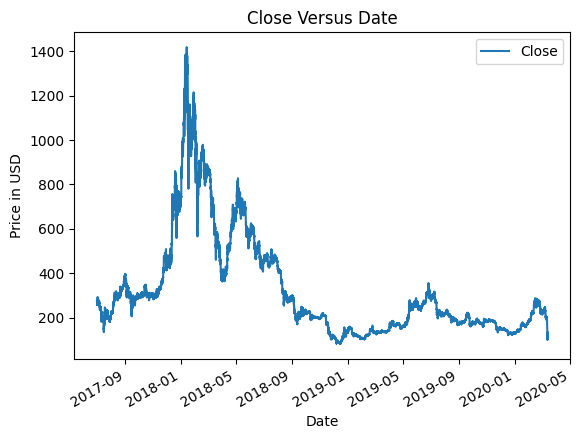

,Date,Close
count,23674,23674.000000
mean,2018-11-06 15:30:00,324.926601
min,2017-07-01 11:00:00,81.290000
25%,2018-03-05 01:15:00,171.512500
50%,2018-11-06 15:30:00,229.725000
75%,2019-07-11 05:45:00,402.797500
max,2020-03-13 20:00:00,1418.610000
std,NaN,236.192308


In [258]:
graph=df2[['Date','Close']]
ax=graph.plot(x='Date',y='Close')
plt.title('Close Versus Date')
plt.ylabel('Price in USD')
plt.show()
graph.describe()

In [ ]:
df2.set_index('Date',inplace=True)

In [318]:
df2.sort_index(ascending=True,inplace=True)
df2.loc['2020']

,Day,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-01-01 00:00:00,Wednesday,ETHUSD,128.54,128.54,128.12,128.34,245119.91
2020-01-01 01:00:00,Wednesday,ETHUSD,128.34,130.14,128.32,130.14,635419.40
2020-01-01 02:00:00,Wednesday,ETHUSD,130.14,130.50,129.91,130.37,396315.72
2020-01-01 03:00:00,Wednesday,ETHUSD,130.37,130.44,129.38,129.57,496704.23
2020-01-01 04:00:00,Wednesday,ETHUSD,129.57,130.00,129.50,129.56,702786.82
...,...,...,...,...,...,...,...
2020-03-13 16:00:00,Friday,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
2020-03-13 17:00:00,Friday,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 18:00:00,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [321]:
df2.loc['2020-02-05':'2020-02-15']


,Day,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-02-05 00:00:00,Wednesday,ETHUSD,188.24,189.96,188.16,189.12,593765.71
2020-02-05 01:00:00,Wednesday,ETHUSD,189.12,189.89,187.76,188.00,664807.39
2020-02-05 02:00:00,Wednesday,ETHUSD,188.00,188.82,187.68,188.81,220704.52
2020-02-05 03:00:00,Wednesday,ETHUSD,188.81,189.26,186.89,189.19,718809.27
2020-02-05 04:00:00,Wednesday,ETHUSD,189.19,189.70,188.54,189.66,467702.88
...,...,...,...,...,...,...,...
2020-02-15 19:00:00,Saturday,ETHUSD,268.57,270.13,265.33,266.36,4048065.13
2020-02-15 20:00:00,Saturday,ETHUSD,266.36,267.47,265.54,267.03,2447329.30
2020-02-15 21:00:00,Saturday,ETHUSD,267.03,269.21,266.04,268.01,1218378.20


In [325]:
df2.resample('W').agg({'Close':'mean','High':'max','Low':'min','Volume':'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


# <center><b>This Concludes This Practice Session</b></center>
There is a lot more to learn and undercover.